In [2]:
# Cell 1: Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

print("Libraries loaded ✅")

Libraries loaded ✅


In [3]:
# Cell 2: Explore SisFall
print("=" * 60)
print("DATASET 1: SisFall")
print("=" * 60)

sisfall_path = "../data/raw/SisFall/"

# List all subject folders
subjects = sorted(os.listdir(sisfall_path))
print(f"\nTotal subjects: {len(subjects)}")
print(f"Adult subjects (SA): {[s for s in subjects if s.startswith('SA')]}")
print(f"Elderly subjects (SE): {[s for s in subjects if s.startswith('SE')]}")

# Look inside one subject folder
sample_subject = "SA01"
subject_path = os.path.join(sisfall_path, sample_subject)
files = sorted(os.listdir(subject_path))
print(f"\nFiles in {sample_subject}: {len(files)}")
print(f"First 10 files: {files[:10]}")

DATASET 1: SisFall

Total subjects: 40
Adult subjects (SA): ['SA01', 'SA02', 'SA03', 'SA04', 'SA05', 'SA06', 'SA07', 'SA08', 'SA09', 'SA10', 'SA11', 'SA12', 'SA13', 'SA14', 'SA15', 'SA16', 'SA17', 'SA18', 'SA19', 'SA20', 'SA21', 'SA22', 'SA23']
Elderly subjects (SE): ['SE01', 'SE02', 'SE03', 'SE04', 'SE05', 'SE06', 'SE07', 'SE08', 'SE09', 'SE10', 'SE11', 'SE12', 'SE13', 'SE14', 'SE15']

Files in SA01: 155
First 10 files: ['D01_SA01_R01.txt', 'D02_SA01_R01.txt', 'D03_SA01_R01.txt', 'D04_SA01_R01.txt', 'D05_SA01_R01.txt', 'D05_SA01_R02.txt', 'D05_SA01_R03.txt', 'D05_SA01_R04.txt', 'D05_SA01_R05.txt', 'D06_SA01_R01.txt']


In [4]:
# Cell 3: Load one SisFall file and see the data
sample_file = os.path.join(sisfall_path, "SA01", files[0])
print(f"Loading: {sample_file}")

# Try loading (SisFall files may have different separators)
try:
    sisfall_sample = pd.read_csv(sample_file, header=None)
except:
    sisfall_sample = pd.read_csv(sample_file, header=None, sep=';')

print(f"\nShape: {sisfall_sample.shape}")
print(f"Columns: {sisfall_sample.columns.tolist()}")
print(f"\nFirst 10 rows:")
print(sisfall_sample.head(10))
print(f"\nData types:\n{sisfall_sample.dtypes}")
print(f"\nBasic stats:\n{sisfall_sample.describe()}")

Loading: ../data/raw/SisFall/SA01\D01_SA01_R01.txt

Shape: (19999, 9)
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8]

First 10 rows:
    0    1   2    3    4    5    6     7      8
0  17 -179 -99  -18 -504 -352   76  -697  -279;
1  15 -174 -90  -53 -568 -306   48  -675  -254;
2   1 -176 -81  -84 -613 -271   -2  -668  -221;
3 -10 -180 -77 -104 -647 -227  -34  -697  -175;
4 -21 -191 -63 -128 -675 -191  -74  -741  -133;
5 -37 -225 -59 -146 -700 -159 -110  -840  -103;
6 -36 -243 -46 -166 -722 -131 -147  -948   -75;
7 -44 -271 -38 -190 -738 -107 -171 -1073   -38;
8 -51 -312 -33 -210 -752  -90 -200 -1191     3;
9 -55 -339 -19 -214 -764  -72 -212 -1298    52;

Data types:
0    int64
1    int64
2    int64
3    int64
4    int64
5    int64
6    int64
7    int64
8      str
dtype: object

Basic stats:
                  0             1             2             3             4  \
count  19999.000000  19999.000000  19999.000000  19999.000000  19999.000000   
mean       9.248212   -261.692585    -26.742037    

In [5]:
# Cell 4: Explore WISDM
print("=" * 60)
print("DATASET 2: WISDM")
print("=" * 60)

wisdm_path = "../data/raw/WISDM/"

# List files
wisdm_files = os.listdir(wisdm_path)
print(f"\nFiles in WISDM folder: {wisdm_files}")

# Find the main data file
# It could be named differently, let's check
for f in wisdm_files:
    filepath = os.path.join(wisdm_path, f)
    size = os.path.getsize(filepath) / (1024 * 1024)  # MB
    print(f"  {f} - {size:.2f} MB")

DATASET 2: WISDM

Files in WISDM folder: ['readme.txt', 'WISDM_ar_v1.1_raw.txt', 'WISDM_ar_v1.1_raw_about.txt', 'WISDM_ar_v1.1_transformed.arff', 'WISDM_ar_v1.1_trans_about.txt']
  readme.txt - 0.00 MB
  WISDM_ar_v1.1_raw.txt - 47.99 MB
  WISDM_ar_v1.1_raw_about.txt - 0.00 MB
  WISDM_ar_v1.1_transformed.arff - 1.15 MB
  WISDM_ar_v1.1_trans_about.txt - 0.00 MB


In [6]:
# Cell 5: Load WISDM data
# Try different possible filenames
possible_files = [
    "WISDM_ar_v1.1_raw.txt",
    "WISDM_ar_latest.txt", 
    "WISDM_raw.txt"
]

wisdm_data = None
for fname in possible_files:
    fpath = os.path.join(wisdm_path, fname)
    if os.path.exists(fpath):
        print(f"Found: {fname}")
        try:
            wisdm_data = pd.read_csv(
                fpath, 
                header=None,
                names=['user', 'activity', 'timestamp', 'x', 'y', 'z'],
                on_bad_lines='skip'
            )
            break
        except:
            # Try reading first few lines manually
            with open(fpath, 'r') as f:
                for i, line in enumerate(f):
                    if i < 5:
                        print(f"  Line {i}: {line.strip()}")
            break

# If none of the above worked, load whatever file is there
if wisdm_data is None:
    print("\nTrying to load first .txt file...")
    for f in wisdm_files:
        if f.endswith('.txt'):
            fpath = os.path.join(wisdm_path, f)
            with open(fpath, 'r') as file:
                for i, line in enumerate(file):
                    if i < 5:
                        print(f"  Line {i}: {line.strip()}")
            break

if wisdm_data is not None:
    print(f"\nShape: {wisdm_data.shape}")
    print(f"\nFirst 10 rows:")
    print(wisdm_data.head(10))
    print(f"\nActivities: {wisdm_data['activity'].unique()}")
    print(f"\nUsers: {wisdm_data['user'].nunique()}")

Found: WISDM_ar_v1.1_raw.txt

Shape: (1086466, 6)

First 10 rows:
   user activity       timestamp         x          y             z
0    33  Jogging  49105962326000 -0.694638  12.680544   0.50395286;
1    33  Jogging  49106062271000  5.012288  11.264028   0.95342433;
2    33  Jogging  49106112167000  4.903325  10.882658  -0.08172209;
3    33  Jogging  49106222305000 -0.612916  18.496431    3.0237172;
4    33  Jogging  49106332290000 -1.184970  12.108489     7.205164;
5    33  Jogging  49106442306000  1.375655  -2.492524    -6.510526;
6    33  Jogging  49106542312000 -0.612916  10.569390     5.706926;
7    33  Jogging  49106652389000 -0.503953  13.947236    7.0553403;
8    33  Jogging  49106762313000 -8.430995  11.413852     5.134871;
9    33  Jogging  49106872299000  0.953424   1.375655    1.6480621;

Activities: <StringArray>
['Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
Length: 6, dtype: str

Users: 36


In [7]:
# Cell 6: Explore PAMAP2
print("=" * 60)
print("DATASET 3: PAMAP2")
print("=" * 60)

pamap_protocol_path = "../data/raw/PAMAP2/Protocol/"
pamap_optional_path = "../data/raw/PAMAP2/Optional/"

# List files
protocol_files = sorted(os.listdir(pamap_protocol_path))
optional_files = sorted(os.listdir(pamap_optional_path))

print(f"\nProtocol files: {protocol_files}")
print(f"Optional files: {optional_files}")

DATASET 3: PAMAP2

Protocol files: ['subject101.dat', 'subject102.dat', 'subject103.dat', 'subject104.dat', 'subject105.dat', 'subject106.dat', 'subject107.dat', 'subject108.dat', 'subject109.dat']
Optional files: ['subject101.dat', 'subject105.dat', 'subject106.dat', 'subject108.dat', 'subject109.dat']


In [8]:
# Cell 7: Load one PAMAP2 file
sample_pamap = os.path.join(pamap_protocol_path, "subject101.dat")
print(f"Loading: {sample_pamap}")

pamap_data = pd.read_csv(sample_pamap, sep=' ', header=None)

print(f"\nShape: {pamap_data.shape}")
print(f"Total columns: {len(pamap_data.columns)}")
print(f"\nFirst 5 rows (first 10 columns only):")
print(pamap_data.iloc[:5, :10])

# Check activity IDs
activity_map = {
    0: 'Transition',
    1: 'Lying', 
    2: 'Sitting', 
    3: 'Standing', 
    4: 'Walking',
    5: 'Running', 
    6: 'Cycling', 
    7: 'Nordic_walking',
    12: 'Stairs_up', 
    13: 'Stairs_down', 
    16: 'Vacuum_cleaning',
    17: 'Ironing', 
    24: 'Rope_jumping'
}

activities_present = pamap_data[1].unique()
print(f"\nActivity IDs present: {sorted(activities_present)}")
print(f"\nActivity names:")
for aid in sorted(activities_present):
    name = activity_map.get(int(aid), f"Unknown ({aid})")
    count = len(pamap_data[pamap_data[1] == aid])
    print(f"  {int(aid)}: {name} ({count} samples)")

Loading: ../data/raw/PAMAP2/Protocol/subject101.dat

Shape: (376417, 54)
Total columns: 54

First 5 rows (first 10 columns only):
      0  1      2     3        4        5        6        7        8        9
0  8.38  0  104.0  30.0  2.37223  8.60074  3.51048  2.43954  8.76165  3.35465
1  8.39  0    NaN  30.0  2.18837  8.56560  3.66179  2.39494  8.55081  3.64207
2  8.40  0    NaN  30.0  2.37357  8.60107  3.54898  2.30514  8.53644  3.73280
3  8.41  0    NaN  30.0  2.07473  8.52853  3.66021  2.33528  8.53622  3.73277
4  8.42  0    NaN  30.0  2.22936  8.83122  3.70000  2.23055  8.59741  3.76295

Activity IDs present: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(12), np.int64(13), np.int64(16), np.int64(17), np.int64(24)]

Activity names:
  0: Transition (126460 samples)
  1: Lying (27187 samples)
  2: Sitting (23480 samples)
  3: Standing (21717 samples)
  4: Walking (22253 samples)
  5: Running (21265 samples)
  6: Cycli

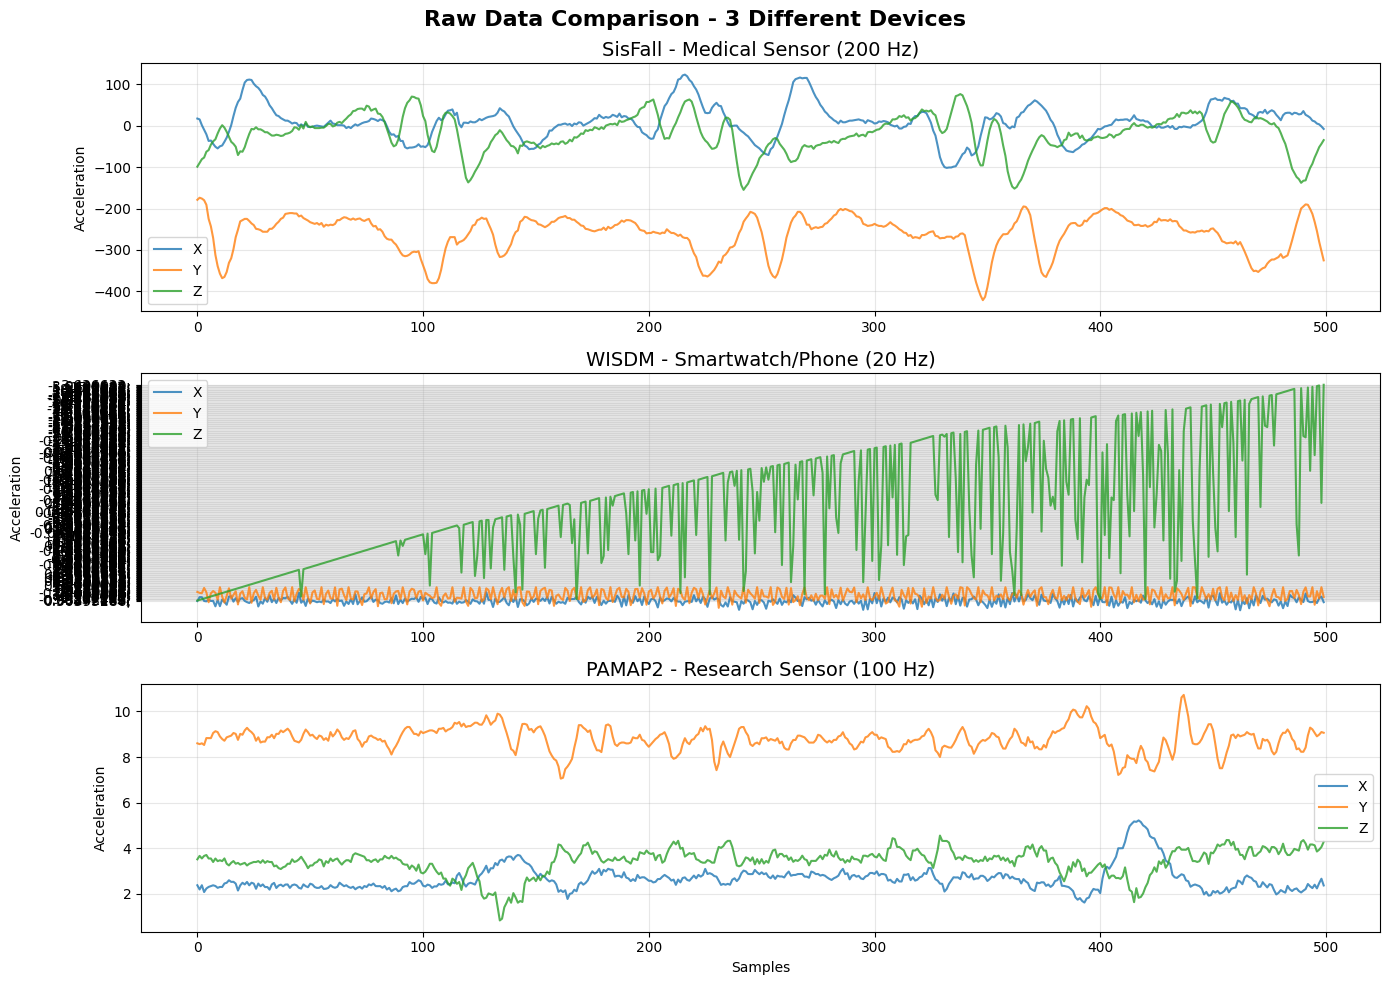

✅ Plot saved to docs/raw_data_comparison.png


In [9]:
# Cell 8: Visualize sample data from all 3 datasets
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# SisFall
axes[0].plot(sisfall_sample.iloc[:500, 0], label='X', alpha=0.8)
axes[0].plot(sisfall_sample.iloc[:500, 1], label='Y', alpha=0.8)
axes[0].plot(sisfall_sample.iloc[:500, 2], label='Z', alpha=0.8)
axes[0].set_title('SisFall - Medical Sensor (200 Hz)', fontsize=14)
axes[0].set_ylabel('Acceleration')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# WISDM
if wisdm_data is not None:
    wisdm_clean = wisdm_data.dropna()
    axes[1].plot(wisdm_clean['x'].values[:500], label='X', alpha=0.8)
    axes[1].plot(wisdm_clean['y'].values[:500], label='Y', alpha=0.8)
    axes[1].plot(wisdm_clean['z'].values[:500], label='Z', alpha=0.8)
axes[1].set_title('WISDM - Smartwatch/Phone (20 Hz)', fontsize=14)
axes[1].set_ylabel('Acceleration')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# PAMAP2 (columns 5,6,7 = hand accelerometer x,y,z)
axes[2].plot(pamap_data.iloc[:500, 4], label='X', alpha=0.8)
axes[2].plot(pamap_data.iloc[:500, 5], label='Y', alpha=0.8)
axes[2].plot(pamap_data.iloc[:500, 6], label='Z', alpha=0.8)
axes[2].set_title('PAMAP2 - Research Sensor (100 Hz)', fontsize=14)
axes[2].set_ylabel('Acceleration')
axes[2].set_xlabel('Samples')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.suptitle('Raw Data Comparison - 3 Different Devices', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../docs/raw_data_comparison.png', dpi=150)
plt.show()

print("✅ Plot saved to docs/raw_data_comparison.png")

In [10]:
# Cell 9: Summary of all 3 datasets
print("=" * 60)
print("SUMMARY OF ALL 3 DATASETS")
print("=" * 60)

print(f"""
┌──────────────┬──────────────┬──────────────┬──────────────┐
│   Feature    │   SisFall    │    WISDM     │   PAMAP2     │
├──────────────┼──────────────┼──────────────┼──────────────┤
│ Shape        │ {str(sisfall_sample.shape):12s} │ {str(wisdm_data.shape) if wisdm_data is not None else 'N/A':12s} │ {str(pamap_data.shape):12s} │
│ Columns Used │ 3 (acc xyz)  │ 3 (acc xyz)  │ 3 (acc xyz)  │
│ Sampling     │ 200 Hz       │ 20 Hz        │ 100 Hz       │
│ Has Falls    │ YES          │ NO           │ NO           │
└──────────────┴──────────────┴──────────────┴──────────────┘
""")

print("✅ Data exploration complete!")
print("\n🎯 NEXT STEP: Preprocessing (Step 2)")

SUMMARY OF ALL 3 DATASETS

┌──────────────┬──────────────┬──────────────┬──────────────┐
│   Feature    │   SisFall    │    WISDM     │   PAMAP2     │
├──────────────┼──────────────┼──────────────┼──────────────┤
│ Shape        │ (19999, 9)   │ (1086466, 6) │ (376417, 54) │
│ Columns Used │ 3 (acc xyz)  │ 3 (acc xyz)  │ 3 (acc xyz)  │
│ Sampling     │ 200 Hz       │ 20 Hz        │ 100 Hz       │
│ Has Falls    │ YES          │ NO           │ NO           │
└──────────────┴──────────────┴──────────────┴──────────────┘

✅ Data exploration complete!

🎯 NEXT STEP: Preprocessing (Step 2)
